In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import nltk
nltk.download()
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.stem import WordNetLemmatizer

### Reading Economical data

In [3]:
gdp=pd.read_csv("/Users/ishanishah/Documents/nlp/Project/Economical_data/GDP_Percent.csv")

foriegn_exhange=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/FER.csv')

inflation_rate=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/INFL_RATE.csv')

purchasing_rate=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/PPP.csv')

Import=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/IMPORTS.csv')

export=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/EXPORTS.csv')

gdp_country=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/COUNTRY_GDP.csv')

INVEST=pd.read_csv('/Users/ishanishah/Documents/nlp/Project/Economical_data/INVEST.csv')

In [4]:
gdp.head(1)

,Unnamed: 0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,USA,-0.257,2.538,-1.802,4.584,7.237,4.169,3.463,3.46,4.177,...,2.564,1.551,2.249,1.842,2.526,2.908,1.638,2.37,2.927,2.35


### Merging all Economical Datasets

In [5]:
#transposing dataframe

GDP_P = gdp.T 
PPP = purchasing_rate.T
GDP_C = gdp_country.T 
Export = export.T 
FER = foriegn_exhange.T 
INFL = inflation_rate.T 
Invest = INVEST.T 
Import = Import.T 

In [6]:
GDP_P.head(1)

,0,1,2,3,4,5,6,7,8
Unnamed: 0,USA,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,AUSTRALIA,BRAZIL


In [7]:
GDP_P.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
GDP_P = GDP_P.drop('Unnamed: 0')

PPP.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
PPP = PPP.drop('Unnamed: 0')

GDP_C.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
GDP_C = GDP_C.drop('Unnamed: 0')

Export.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Export = Export.drop('Unnamed: 0')

FER.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
FER = FER.drop('Unnamed: 0')

INFL.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
INFL = INFL.drop('Unnamed: 0')

Invest.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Invest = Invest.drop('Unnamed: 0')

Import.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Import = Import.drop('Unnamed: 0')

In [8]:
#Creating new Country Column for Main dataset

USA=pd.DataFrame(['USA']*40,columns=['Country'])

CHINA=pd.DataFrame(['CHINA']*40,columns=['Country'])

INDIA=pd.DataFrame(['INDIA']*40,columns=['Country'])

JAPAN=pd.DataFrame(['JAPAN']*40,columns=['Country'])

SWITZERLAND=pd.DataFrame(['SWITZERLAND']*40,columns=['Country'])

CANADA=pd.DataFrame(['CANADA']*40,columns=['Country'])

AUSTRALIA=pd.DataFrame(['AUSTRALIA']*40,columns=['Country'])

BRAZIL=pd.DataFrame(['BRAZIL']*40,columns=['Country'])

UK=pd.DataFrame(['UK']*40,columns=['Country'])

Economical_data=pd.concat([USA,CHINA,INDIA,JAPAN,SWITZERLAND,CANADA,AUSTRALIA,BRAZIL,UK])

In [9]:
#Creating new Year Column for Main dataset

Years=[]
for i in range(len(Import)):
    Years.append(Import.index[i])
    
Years=Years*9
   
Economical_data['Year']=Years

In [10]:
# Creating new Economical Columsns for main dataset

gdp_p=[]
for i in range(40):
    for j in GDP_P.columns:
          gdp_p.append(GDP_P[j][i])
            
Economical_data['GDP_P']=gdp_p 

#######################################################

ppp=[]
for i in range(40):
    for j in GDP_P.columns:
          ppp.append(PPP[j][i])
            
Economical_data['PPP']=ppp

#######################################################

gdp_c=[]
for i in range(40):
    for j in GDP_P.columns:
          gdp_c.append(GDP_C[j][i])
            
Economical_data['GDP_C']=gdp_c

#######################################################

ex=[]
for i in range(40):
    for j in GDP_P.columns:
          ex.append(Export[j][i])
            
Economical_data['Export']=ex

#######################################################

infl=[]
for i in range(40):
    for j in GDP_P.columns:
          infl.append(INFL[j][i])
            
Economical_data['INFL']=infl

#######################################################

inv=[]
for i in range(40):
    for j in GDP_P.columns:
          inv.append(Invest[j][i])
            
Economical_data['Invest']=inv

#######################################################

imp=[]
for i in range(40):
    for j in GDP_P.columns:
          imp.append(Import[j][i])
            
Economical_data['Import']=imp

#######################################################

fer=[]
for i in range(40):
    for j in GDP_P.columns:
          fer.append(FER[j][i])
            
Economical_data['FER']=fer
#######################################################

Economical_data=Economical_data.reset_index()

In [11]:
Economical_data.head()

,index,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER
0,0,USA,1980,-0.257,1.000000,12574.79151,12.292,13.549200,23.310,-7.449,1.000000
1,1,USA,1981,7.910,1.497000,194.804722,NaN,2.500000,35.476,NaN,1.498386
2,2,USA,1982,5.281,3.664000,266.577848,1.423,11.346060,19.169,14.044,7.862945
3,3,USA,1983,3.181,243.360647,9465.379714,8.834,7.778582,33.912,-16.650,226.740833
4,4,USA,1984,-2.028,0.507410,10032.0621,0.927,17.965930,19.030,-5.344,0.430295


### Preprocessing Article data

In [11]:
#Article data does not contain record for year 1980 so removing the rows with 1980

removing_rows=[]
for i in range(len(Economical_data)):
    if Economical_data['Year'][i]=='1980':
        removing_rows.append(i)
        
Economical_data= Economical_data.drop(removing_rows,axis=0)

In [10]:
# Article cleaning for one dataset --(trying)

stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)

data=pd.read_csv('/Users/ishanishah/Documents/NLP Project/Project/Articles/articles_1981.csv')    
string='articles_1981.csv'

date=int(string[9:13])
date

data['date']=date

In [17]:
#Function for cleaning article
from nltk.stem import WordNetLemmatizer 
def lem(data):
    final_corpus = []
    stemmer = WordNetLemmatizer()

    for i in range(len(data)):
        word = word_tokenize(data['article'][i].lower())
        word = [stemmer.lemmatize(y) for y in word if y not in stuff_to_be_removed]
        word =' '.join(word)
        word =re.sub("[^-9A-Za-z ]", "" , word)
        
        
        data['article'][i]=word
    return data

In [18]:
data=lem(data)
article=data[['date','article']]
final_data=article

In [20]:
# reading all the csv and cleaning it

main='/Users/ishanishah/Documents/NLP Project/Project/Articles'

for class_name in os.listdir(main):
    if class_name!='articles_1981.csv' and class_name.startswith('a'):
        print(class_name)
        data=pd.read_csv('/Users/ishanishah/Documents/Technocolab Software/Project/articles/'+class_name)
        date=int(class_name[9:13])
        data['date']=date
        data['article']=data['article'].astype(str)
        data=lem(data)
        article=data[['date','article']]
        final_data=pd.concat([final_data,article],axis=0)

articles_2016.csv
articles_2002.csv
articles_2003.csv
articles_2017.csv
articles_2001.csv
articles_2015.csv
articles_2014.csv
articles_2000.csv
articles_2004.csv
articles_2010.csv
articles_2011.csv
articles_2005.csv
articles_2013.csv
articles_2007.csv
articles_2006.csv
articles_2012.csv
articles_1999.csv
articles_1998.csv
articles_1988.csv
articles_1989.csv
articles_1987.csv
articles_1993.csv
articles_1992.csv
articles_1986.csv
articles_1990.csv
articles_1984.csv
articles_1985.csv
articles_1991.csv
articles_1995.csv
articles_1994.csv
articles_1982.csv
articles_1996.csv
articles_1997.csv
articles_1983.csv
articles_2008.csv
articles_2009.csv
articles_2019.csv
articles_2018.csv


In [21]:
final_data.head()

,date,article
0,2002,washington feb app defer intern crit presid bu...
1,2002,islamabad pak feb british-born milit held kidn...
2,2002,fin liv los angel nam los angel crispin port b...
3,2002,in industry long depend fear unforeseen lat un...
4,2002,tit corp who irrady equip u post serv kil anth...


In [13]:
#Saving cleaned data into Dataframe

#final_data.to_csv('FINAL_DATA.csv')

FINAL_DATA=pd.read_csv('FINAL_DATA.csv')
FINAL_DATA=FINAL_DATA.dropna()

FINAL=FINAL_DATA.drop('Unnamed: 0',axis=1)


### TF-IDF

In [15]:
#Converting article columns into Vectors

stop_words=set(nltk.corpus.stopwords.words('english'))
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
tfidf_vect=vect.fit_transform(FINAL['article'])


#finding least and most word from vector

idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

### LDA Topic Modelling

In [16]:
#Using LDA getting top 5 most discussed topic

lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=42,max_iter=1) 

lda=lda_model.fit_transform(tfidf_vect)

In [17]:
#finding Percentage of discussed topic

for i,topic in enumerate(lda[0]):
      print("Topic ",i,": ",topic*100,"%")

Topic  0 :  70.93261020254587 %
Topic  1 :  22.524240277286996 %
Topic  2 :  2.293638840170278 %
Topic  3 :  2.122135243711458 %
Topic  4 :  2.127375436285404 %


In [18]:
print(lda_model.components_)

[[1.04544250e+03 7.57112867e+02 8.95457442e+02 ... 7.45309690e+01
  5.77580352e+02 1.26448254e+03]
 [2.88621947e+02 8.39582967e+01 2.09108952e-01 ... 1.67894790e+01
  1.41245170e+01 2.05605941e-01]
 [3.45190547e+03 2.00119884e-01 2.00662547e-01 ... 2.00118035e-01
  1.49593150e+00 2.00180599e-01]
 [1.36565684e+03 1.41368947e+03 5.51084231e+02 ... 1.33144973e+02
  4.42898187e+03 1.02079394e+03]
 [1.38100361e+03 9.42392056e+01 1.86057523e+02 ... 1.34191716e+03
  1.10634556e+03 4.66774250e-01]]


In [19]:
#printing top 10 words from each topic

vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
mr said govern stat trump country min pol party polit presid peopl russ unit milit nat lead would year israel 

Topic 1: 
chin chines kore oil airlin hong kong said produc kor plant gas jap unit trad energy stat company sou beid 

Topic 2: 
net qtr int shar earn report company 99 sal loss dec corp sept revenu rev incom jun co march per 

Topic 3: 
mr said company new us year execut tim lik would work busy mil invest york mak market fin peopl publ 

Topic 4: 
perc bank stock mil bil shar invest rat bond company said market fund pric year quart econom yesterday trad fed 



### Creating Final data for Prediction

In [35]:
#Creating new dataframe for top 5 topics

time_stamp_df = FINAL['date']

lda_top_df = pd.DataFrame(lda)

ARTICLE=pd.concat([time_stamp_df,lda_top_df],axis=1)

ARTICLE=ARTICLE.dropna()

ARTICLE['date']=ARTICLE['date'].astype(int)

ARTICLE=ARTICLE.rename(columns = {'date': 'Year', 0: 'Topic-1',1:'Topic-2',2:'Topic-3',3:'Topic-4',4:'Topic-5'}, inplace = False)

temp=ARTICLE.filter(['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'],axis=1) #extracting columns

temp=temp.astype(float)

ARTICLE['Mapping'] = temp.idxmax(axis=1) 

#counting the number of topics in each year

summary = ARTICLE.groupby('Year')['Mapping'].value_counts()

In [41]:
summary.to_csv('summary.csv')

summary=pd.read_csv('summary.csv')

In [120]:
summary=pd.read_csv('summary.csv')

In [121]:
summary.head(7)

,Unnamed: 0,Year,Mapping,SUM
0,0,1981,Topic-1,2719
1,1,1981,Topic-4,1983
2,2,1981,Topic-3,1910
3,3,1981,Topic-5,1839
4,4,1981,Topic-2,746
5,5,1982,Topic-4,1465
6,6,1982,Topic-5,1258


In [122]:
summary=summary.drop('Unnamed: 0',axis=1)

In [123]:
summary.columns = ['Year', 'Mapping', 'SUM']
summary.head()

,Year,Mapping,SUM
0,1981,Topic-1,2719
1,1981,Topic-4,1983
2,1981,Topic-3,1910
3,1981,Topic-5,1839
4,1981,Topic-2,746


In [124]:
#Creating Pivot table for better summarization

summary1 = pd.pivot_table(data=summary, index=['Year'], columns=['Mapping'], values='SUM')

In [125]:
#Scaling above data 

summary1['Total'] = summary1['Topic-1'] + summary1['Topic-2'] + summary1['Topic-3'] +summary1['Topic-4'] +summary1['Topic-5']

summary1['Topic-1'] = summary1['Topic-1']/summary1['Total']
summary1['Topic-2'] = summary1['Topic-2']/summary1['Total']
summary1['Topic-3'] = summary1['Topic-3']/summary1['Total']
summary1['Topic-4'] = summary1['Topic-4']/summary1['Total']
summary1['Topic-5'] = summary1['Topic-5']/summary1['Total']



summary1 = summary1.filter(['Year', 'Topic-1', 'Topic-2', 'Topic-3','Topic-4','Topic-5'])
summary1 = summary1.astype(float)

In [126]:
#Creating Year Column for main data

summary1=summary1.fillna(0)

years=[]
for i in Economical_data.iloc[:39,2]:
    years.append(i)
    
summary1['Years']=years

In [127]:
#creating article data in size of economical data

tp=summary1

for i in range(8):
    tp=pd.concat([tp,summary1])

In [128]:
#creating columns in Economical data for Article topics

topic1=tp['Topic-1'].to_list()
Economical_data['Topic-1']=topic1

topic2=tp['Topic-2'].to_list()
Economical_data['Topic-2']=topic2

topic3=tp['Topic-3'].to_list()
Economical_data['Topic-3']=topic3

topic4=tp['Topic-4'].to_list()
Economical_data['Topic-4']=topic4

topic5=tp['Topic-5'].to_list()
Economical_data['Topic-5']=topic5


MAIN=Economical_data.drop('index',axis=1)

In [129]:
MAIN.to_csv('NLP_data.csv')

### Preprocessing final data

In [16]:
NLP_data=pd.read_csv('NLP_data.csv')

In [17]:
NLP_data=NLP_data.drop('Unnamed: 0',axis=1)

In [18]:
NLP_data.tail()

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
345,UK,2015,1.235,0.689107,41030.00,0.683,1.700000,16.423,-0.319,0.783445,0.000000,0.000000,0.000000,0.000000,0.000000
346,UK,2016,0.761,1.155471,83716.81,2.682,0.362916,23.259,2.135,0.993841,0.000000,0.000000,0.000000,0.000000,0.000000
347,UK,2017,1.545,1.202552,46212.84,2.840,1.949269,22.580,1.045,1.326854,0.501504,0.019546,0.000251,0.436725,0.041975
348,UK,2018,1.713,1.471620,53825.16,2.382,1.610768,22.510,-1.060,1.438507,0.000000,0.000000,0.000000,0.000000,0.000000
349,UK,2019,0.875,2.071297,NaN,0.151,3.732976,15.727,1.348,3.927342,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
NLP_data.isnull().sum()

Country     0
Year        0
GDP_P       0
PPP         0
GDP_C       2
Export     18
INFL        0
Invest      0
Import     18
FER         0
Topic-1     0
Topic-2     0
Topic-3     0
Topic-4     0
Topic-5     0
dtype: int64

In [20]:
#Counting percentage of null values

percent_missing = NLP_data.isnull().sum() * 100 / len(NLP_data)
percent_missing

Country    0.000000
Year       0.000000
GDP_P      0.000000
PPP        0.000000
GDP_C      0.571429
Export     5.142857
INFL       0.000000
Invest     0.000000
Import     5.142857
FER        0.000000
Topic-1    0.000000
Topic-2    0.000000
Topic-3    0.000000
Topic-4    0.000000
Topic-5    0.000000
dtype: float64

In [21]:
#diving data into categorical and numerical 

cat=[]
num=[]
for i in NLP_data.columns:
    if NLP_data[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

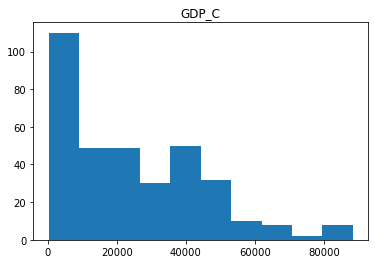

-----------------------------------------------------------


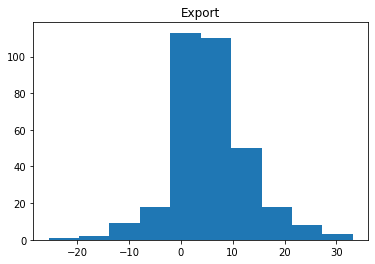

-----------------------------------------------------------


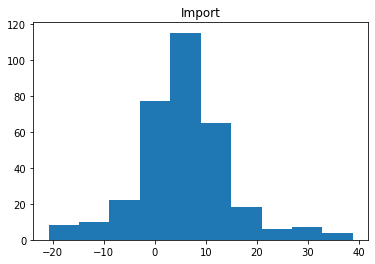

-----------------------------------------------------------


In [22]:
#Checking for skewness of data so accordingly we can replace Null values

Numeric=NLP_data.loc[:,num]
for i in num:
    if Numeric[i].isnull().sum()>0:
        
        plt.title(i)
    
        plt.hist(Numeric[i])

        plt.show()

        print('-----------------------------------------------------------') 

In [23]:
#Replacing null values

NLP_data['Export'].fillna((NLP_data['Export'].mean()), inplace=True)
NLP_data['Import'].fillna((NLP_data['Import'].mean()), inplace=True)
NLP_data['GDP_C'].fillna((NLP_data['GDP_C'].median()), inplace=True)

<AxesSubplot:>

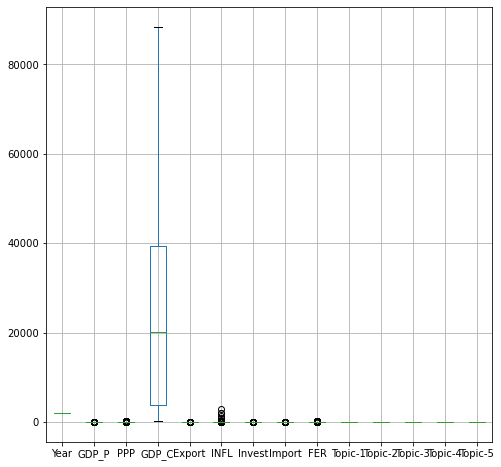

In [24]:
#Checking for outliers

NLP_data.boxplot(figsize=(8,8))

In [25]:
#Handling outliers 

if NLP_data[i].dtype!='object':
        q1 = NLP_data[i].quantile(.25)
        q3 = NLP_data[i].quantile(.75)
        IQR = q3 - q1
        NLP_data[i]= np.clip(NLP_data[i], q1 - 1.5 *IQR, q3 + 1.5 * IQR)

In [26]:
NLP_data

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,USA,1981,7.910,1.497000,194.804722,5.696855,2.500000,35.476,5.839033,1.498386,0.295640,0.081113,0.207676,0.215614,0.199957
1,USA,1982,5.281,3.664000,266.577848,1.423000,11.346060,19.169,14.044000,7.862945,0.272568,0.044511,0.002001,0.366342,0.314579
2,USA,1983,3.181,243.360647,9465.379714,8.834000,7.778582,33.912,-16.650000,226.740833,0.205776,0.029879,0.167396,0.409426,0.187523
3,USA,1984,-2.028,0.507410,10032.062100,0.927000,17.965930,19.030,-5.344000,0.430295,0.255939,0.043511,0.292573,0.212428,0.195549
4,USA,1985,5.110,2.019661,18832.196720,6.969000,4.022499,32.129,8.905000,1.675708,0.286661,0.042005,0.200525,0.265783,0.205026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,UK,2015,1.235,0.689107,41030.000000,0.683000,1.700000,16.423,-0.319000,0.783445,0.000000,0.000000,0.000000,0.000000,0.000000
346,UK,2016,0.761,1.155471,83716.810000,2.682000,0.362916,23.259,2.135000,0.993841,0.000000,0.000000,0.000000,0.000000,0.000000
347,UK,2017,1.545,1.202552,46212.840000,2.840000,1.949269,22.580,1.045000,1.326854,0.501504,0.019546,0.000251,0.436725,0.041975
348,UK,2018,1.713,1.471620,53825.160000,2.382000,1.610768,22.510,-1.060000,1.438507,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
#As we know our Numerical data is not normal so we are normalising it here

from sklearn import preprocessing

x=NLP_data.iloc[:,2:]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [28]:
x_scaled

,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,0.646391,0.006151,0.000000,0.531813,0.001322,0.628571,0.447319,0.006016,0.589507,1.000000,0.410984,0.438801,0.616404
1,0.518869,0.015056,0.000814,0.459041,0.004322,0.140308,0.584847,0.031568,0.543502,0.548752,0.003959,0.745550,0.969748
2,0.417006,1.000000,0.105084,0.585230,0.003112,0.581741,0.070365,0.910325,0.410318,0.368358,0.331271,0.833233,0.578077
3,0.164338,0.002085,0.111507,0.450595,0.006567,0.136146,0.259873,0.001728,0.510343,0.536420,0.578992,0.432317,0.602816
4,0.510574,0.008299,0.211258,0.553474,0.001839,0.528355,0.498709,0.006728,0.571603,0.517858,0.396832,0.540902,0.632030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.322614,0.002832,0.462875,0.446440,0.001051,0.058087,0.344100,0.003145,0.000000,0.000000,0.000000,0.000000,0.000000
346,0.299622,0.004748,0.946738,0.480478,0.000598,0.262770,0.385233,0.003990,0.000000,0.000000,0.000000,0.000000,0.000000
347,0.337650,0.004941,0.521623,0.483168,0.001136,0.242440,0.366963,0.005327,1.000000,0.240976,0.000496,0.888789,0.129395
348,0.345799,0.006047,0.607911,0.475370,0.001021,0.240344,0.331680,0.005775,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
#adding scaled data to a new dataframe
NLP_data['GDP_P']=x_scaled['GDP_P']
NLP_data['PPP']=x_scaled['PPP']
NLP_data['GDP_C']=x_scaled['GDP_C']
NLP_data['Export']=x_scaled['Export']
NLP_data['INFL']=x_scaled['INFL']
NLP_data['Invest']=x_scaled['Invest']
NLP_data['Import']=x_scaled['Import']
NLP_data['FER']=x_scaled['FER']
NLP_data['Topic-1']=x_scaled['Topic-1']
NLP_data['Topic-2']=x_scaled['Topic-2']
NLP_data['Topic-3']=x_scaled['Topic-3']
NLP_data['Topic-4']=x_scaled['Topic-4']
NLP_data['Topic-5']=x_scaled['Topic-5']

<AxesSubplot:>

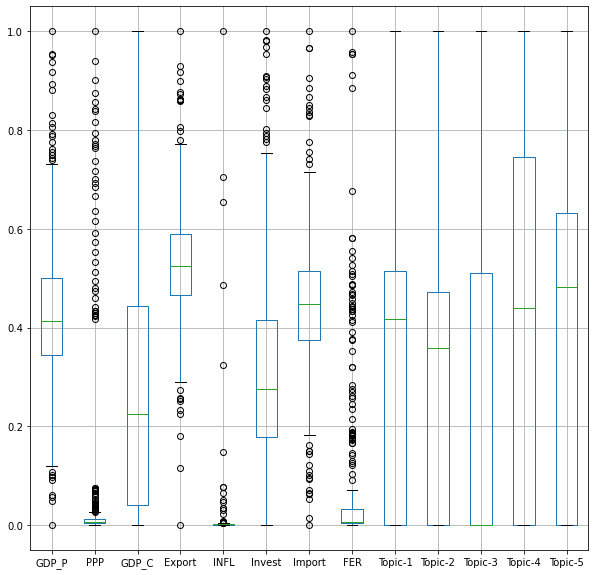

In [30]:
NLP_data.iloc[:,2:].boxplot(figsize=(10,10))

In [31]:
#Converting Categorical data into Numerical Data using label encoder 

from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
NLP_data['Country']= label_encoder.fit_transform(NLP_data['Country'])

In [32]:
NLP_data=NLP_data.sort_values('Year')
NLP_data=NLP_data.reset_index()
NLP_data=NLP_data.drop('index',axis=1)

In [33]:
for i in range(len(NLP_data)):
    if NLP_data['Year'][i]==2006:
        Train=NLP_data.iloc[:i,:]
        Test=NLP_data.iloc[i:,:]
        break

In [34]:
NLP_data.to_csv('Final_most_data.csv')

In [35]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,GridSearchCV
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
data=pd.read_csv('Final_most_data.csv')


In [120]:
data=data.drop('Unnamed: 0',axis=1)

In [121]:
data.head()

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,8,1981,0.646391,0.006151,0.000000,0.531813,0.001322,0.628571,0.447319,0.006016,0.589507,1.0,0.410984,0.438801,0.616404
1,3,1981,0.413029,0.007990,0.184813,0.766623,0.001469,0.370861,0.454878,0.009434,0.589507,1.0,0.410984,0.438801,0.616404
2,7,1981,0.296178,0.005128,0.490817,0.492891,0.000856,0.280406,0.354542,0.005134,0.589507,1.0,0.410984,0.438801,0.616404
3,1,1981,0.584692,0.062087,0.014320,0.644639,0.003478,0.751752,0.633959,0.187374,0.589507,1.0,0.410984,0.438801,0.616404
4,4,1981,0.440871,0.004109,0.256882,0.629314,0.002111,0.240464,0.421589,0.004015,0.589507,1.0,0.410984,0.438801,0.616404


In [122]:
data.isnull().sum()

Country    0
Year       0
GDP_P      0
PPP        0
GDP_C      0
Export     0
INFL       0
Invest     0
Import     0
FER        0
Topic-1    0
Topic-2    0
Topic-3    0
Topic-4    0
Topic-5    0
dtype: int64

In [123]:
# Removing GDP_P as it is just the percentange of GDP_C

data=data.drop('GDP_P',axis=1)

In [124]:
X=data.drop(['FER','Country'],axis=1)
Y=data['FER']

In [125]:
numeric=[]
for i in data.columns:
  if data[i].dtype=='float':
    numeric.append(i)

In [126]:
df=data.loc[:,numeric]
df

,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,0.006151,0.000000,0.531813,0.001322,0.628571,0.447319,0.006016,0.589507,1.0,0.410984,0.438801,0.616404
1,0.007990,0.184813,0.766623,0.001469,0.370861,0.454878,0.009434,0.589507,1.0,0.410984,0.438801,0.616404
2,0.005128,0.490817,0.492891,0.000856,0.280406,0.354542,0.005134,0.589507,1.0,0.410984,0.438801,0.616404
3,0.062087,0.014320,0.644639,0.003478,0.751752,0.633959,0.187374,0.589507,1.0,0.410984,0.438801,0.616404
4,0.004109,0.256882,0.629314,0.002111,0.240464,0.421589,0.004015,0.589507,1.0,0.410984,0.438801,0.616404
...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.004935,0.245230,0.586218,0.001024,0.201659,0.628964,0.005559,0.000000,0.0,0.000000,0.000000,0.000000
346,0.004109,0.563227,0.554922,0.001545,0.138362,0.452414,0.004015,0.000000,0.0,0.000000,0.000000,0.000000
347,0.857243,0.122307,0.705733,0.001242,0.463381,0.545977,0.953612,0.000000,0.0,0.000000,0.000000,0.000000
348,0.002845,0.507491,0.548315,0.000610,0.081981,0.423265,0.002628,0.000000,0.0,0.000000,0.000000,0.000000


In [127]:
#Transforming data beacause data is not linear

trans=df.transform([np.sqrt])

#adding Year and Country into transform data

trans['Years']=data['Year']
trans['Country']=data['Country']

In [128]:
trans.isnull().sum()

PPP      sqrt    0
GDP_C    sqrt    0
Export   sqrt    0
INFL     sqrt    0
Invest   sqrt    0
Import   sqrt    0
FER      sqrt    0
Topic-1  sqrt    0
Topic-2  sqrt    0
Topic-3  sqrt    0
Topic-4  sqrt    0
Topic-5  sqrt    0
Years            0
Country          0
dtype: int64

In [129]:
Y=trans['FER']
X=trans.drop(['FER'],axis=1)

In [130]:
#Renaming the columns

new_col=[]
for i in range(len(X.columns)):
  new_col.append(X.columns[i][0])

#reseting columns

X=X.set_axis(new_col, axis=1, inplace=False)

In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X['Country']=le.fit_transform(X['Country'])

### Train Test split

In [132]:
#Dividing data as per task (Train-1980-2005,Test-2006-2019)

for i in range(len(X)):
  if X['Years'][i]==2006:
    x_train=X.iloc[:i,:]
    x_test=X.iloc[i:,:]
    y_train=Y.iloc[:i,:]
    y_test=Y.iloc[i:,:]
    break

In [133]:
#functions to evaluate models

def cross_val(model):
  pred = cross_val_score(model, Features, Label, cv=10)
  return pred.mean()

def print_evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)

  mse = metrics.mean_squared_error(true, predicted)

  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

  r2_square = metrics.r2_score(true, predicted)

  print('MAE:', mae)

  print('MSE:', mse)

  print('RMSE:', rmse)

  print('R2 Square', r2_square)

def evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)

  mse = metrics.mean_squared_error(true, predicted)

  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

  r2_square = metrics.r2_score(true, predicted)

  return mae, mse, rmse, r2_square


### Modelling

In [134]:
#Linear Regression 

LR=LinearRegression()
LR.fit(x_train,y_train)
y_lr=LR.predict(x_test)

print_evaluate(y_test, y_lr)

MAE: 0.039763806158269924
MSE: 0.00295891616203112
RMSE: 0.05439592045393772
R2 Square 0.9398725104618952


In [135]:
#Random forest regressor

RF1=RandomForestRegressor()
RF1.fit(x_train,y_train)
y_pred_rf=RF1.predict(x_test)

print_evaluate(y_test, y_pred_rf)

MAE: 0.0078037502796752
MSE: 0.00023025755341335227
RMSE: 0.015174239796884464
R2 Square 0.995320986511349


### Modeling with RFE data

In [136]:
#Linear Regression for RFE(Recursive Feature Elimination for feature Extraction)

LR=LinearRegression()
rfe=RFE(LR)
rfe=rfe.fit(x_train,y_train)
imp_features = pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)), columns=['Feature','Support','Ranking'])

In [137]:
imp_features

,Feature,Support,Ranking
0,PPP,True,1
1,GDP_C,True,1
2,Export,False,2
3,INFL,True,1
4,Invest,True,1
5,Import,False,3
6,Topic-1,True,1
7,Topic-2,True,1
8,Topic-3,False,7
9,Topic-4,False,5


In [138]:
rfe_cols = X.columns[rfe.support_]
rfe_cols

Index(['PPP', 'GDP_C', 'INFL', 'Invest', 'Topic-1', 'Topic-2'], dtype='object')

In [139]:
x_new_df=X[rfe_cols]

In [140]:
x_new_df['Years']=X['Years']
x_new_df['Country']=X['Country']

In [141]:
#diving RFE data as per task

for i in range(len(X)):
  if x_new_df['Years'][i]==2006:
    x_train=x_new_df.iloc[:i,:]
    x_test=x_new_df.iloc[i:,:]
    y_train=Y.iloc[:i,:]
    y_test=Y.iloc[i:,:]
    break

In [142]:
#Linear Regression on RFE Data

LR_ref=LinearRegression()
LR_ref.fit(x_train,y_train)
y_ref=LR_ref.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_ref)

Test set evaluation:
_____________________________________
MAE: 0.03865320771038284
MSE: 0.002896442547293696
RMSE: 0.05381860781638351
R2 Square 0.9411420231519586


In [143]:
#Random forest Regressor on RFE data

RF2=RandomForestRegressor()
RF2.fit(x_train,y_train)
y_pred_rf=RF2.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_rf)

Test set evaluation:
_____________________________________
MAE: 0.007410959543106273
MSE: 0.00021747841940352914
RMSE: 0.014747149534860258
R2 Square 0.9955806685044861


In [144]:
#Hyperparameter tunning for Random Forest Regressor
import warnings
warnings.filterwarnings("ignore")
n_folds=5
param_grid = { 
            "n_estimators"      : [10,20,30.40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,12,16,18,20],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF2, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(x_train,y_train)

/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 12, 16, 18, 20],
                         'n_estimators': [10, 20, 30.4, 50]})

In [145]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 10}

In [146]:
grid_rf1=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 4,
 n_estimators= 10)
grid_rf1.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=10)

In [147]:
y_pred_grid_rf=grid_rf1.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)

Test set evaluation:
_____________________________________
MAE: 0.008069058687944289
MSE: 0.0002925689182082509
RMSE: 0.01710464610005863
R2 Square 0.9940547708669563


In [148]:
x_train.columns

Index(['PPP', 'GDP_C', 'INFL', 'Invest', 'Topic-1', 'Topic-2', 'Years',
       'Country'],
      dtype='object')

In [149]:
pickle.dump(RF2, open('Random_forest_with_RFE.pkl','wb'))
#['PPP', 'GDP_C', 'INFL', 'Invest', 'Topic-1', 'Topic-2', 'Years','Country']

### Modeling with VIF data

<AxesSubplot:>

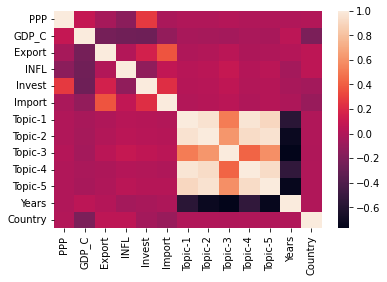

In [107]:
sns.heatmap(X.corr())

In [108]:
vif=pd.DataFrame()
vif['Feature name']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])]

In [109]:
vif

,Feature name,VIF
0,PPP,1.700351
1,GDP_C,5.387391
2,Export,78.033191
3,INFL,1.561098
4,Invest,13.170763
5,Import,37.681057
6,Topic-1,162.357161
7,Topic-2,107.197717
8,Topic-3,4.606862
9,Topic-4,144.137439


In [110]:
#Removing columns having VIF greater than 50

vif_features=X.drop(['Export','Topic-1','Topic-2','Topic-4'],axis=1)
vif_features.head()

,PPP,GDP_C,INFL,Invest,Import,Topic-3,Topic-5,Years,Country
0,0.078431,0.000000,0.036365,0.792824,0.668819,0.641081,0.785114,1981,8
1,0.089387,0.429899,0.038324,0.608983,0.674446,0.641081,0.785114,1981,3
2,0.071612,0.700583,0.029262,0.529534,0.595435,0.641081,0.785114,1981,7
3,0.249172,0.119665,0.058978,0.867036,0.796215,0.641081,0.785114,1981,1
4,0.064102,0.506835,0.045951,0.490371,0.649299,0.641081,0.785114,1981,4


In [111]:
for i in range(len(X)):
  if vif_features['Years'][i]==2006:
    x_train=vif_features.iloc[:i,:]
    x_test=vif_features.iloc[i:,:]
    y_train=Y.iloc[:i,:]
    y_test=Y.iloc[i:,:]
    break

In [112]:
#Linear Regression with VIF

LR_ref=LinearRegression()
LR_ref.fit(x_train,y_train)
y_vif=LR_ref.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_vif)

Test set evaluation:
_____________________________________
MAE: 0.03834287912114577
MSE: 0.0028750856810598685
RMSE: 0.053619825447868336
R2 Square 0.9415760113695091


In [113]:
#Random Forest Regressor With VIF

RF3=RandomForestRegressor()
RF3.fit(x_train,y_train)
y_pred_rf_vif=RF3.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_rf_vif)

Test set evaluation:
_____________________________________
MAE: 0.0071346159333453806
MSE: 0.00022093646502199473
RMSE: 0.014863931681153367
R2 Square 0.9955103983142


In [114]:
#Hyperparameter tunning for Random Forest Regressor
import warnings
warnings.filterwarnings("ignore")
n_folds=5
param_grid = { 
            "n_estimators"      : [10,20,30.40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,12,16,18,20],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF3, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(x_train,y_train)

/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ishanishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 12, 16, 18, 20],
                         'n_estimators': [10, 20, 30.4, 50]})

In [115]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 20}

In [116]:
grid_rf2=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 4,
 n_estimators= 20)
grid_rf2.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=20)

In [117]:
y_pred_grid_rf=grid_rf2.predict(x_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)

Test set evaluation:
_____________________________________
MAE: 0.007890904682012029
MSE: 0.0002589591944457777
RMSE: 0.01609220912260892
R2 Square 0.994737746728131
